In [201]:
import pandas as pd
from requests import get
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-10/nyt_titles.tsv', 
    delimiter='\t')

In [75]:
df.head()

,id,title,author,year,total_weeks,first_week,debut_rank,best_rank
0,0,"""H"" IS FOR HOMICIDE",Sue Grafton,1991,15,1991-05-05,1,2
1,1,"""I"" IS FOR INNOCENT",Sue Grafton,1992,11,1992-04-26,14,2
2,10,''G'' IS FOR GUMSHOE,Sue Grafton,1990,6,1990-05-06,4,8
3,100,A DOG'S JOURNEY,W. Bruce Cameron,2012,1,2012-05-27,3,14
4,1000,CHANGING FACES,Kimberla Lawson Roby,2006,1,2006-02-19,11,14


In [183]:
df = df[['id', 'author', 'best_rank']].dropna()

authors = list(df['author'].unique())
author_best_rank = []
author_number_of_bestsellers = []

for i in authors:
#     if len(df[df['author'] == i]) in range(1, 4):
#         authors.remove(i)
#         continue
    author_best_rank.append(min(df[df['author'] == i]['best_rank']))
    author_number_of_bestsellers.append(len(df[df['author'] == i]))

In [193]:
from collections import Counter as c
c(author_number_of_bestsellers).most_common

<bound method Counter.most_common of Counter({1: 1232, 2: 308, 3: 172, 4: 106, 5: 64, 6: 46, 7: 45, 9: 28, 8: 28, 10: 23, 12: 22, 11: 21, 13: 15, 14: 14, 15: 13, 22: 10, 16: 8, 23: 8, 18: 5, 17: 5, 20: 4, 40: 3, 21: 3, 28: 3, 25: 2, 24: 2, 36: 2, 27: 2, 19: 2, 38: 1, 30: 1, 116: 1, 63: 1, 44: 1, 54: 1, 32: 1, 47: 1, 33: 1, 34: 1, 42: 1, 31: 1, 35: 1, 26: 1})>

In [220]:
data = [
    go.Heatmap(
        x=[i for i in range(len(authors))], # an author
        y=author_best_rank, # author's best rank
        z=author_number_of_bestsellers, #number of bestsellers
        colorscale = [[0.0, 'white'], [1.0, 'black']]
    )
]
fig = go.Figure(data=data)
fig['layout'].update(title='The vertical axis shows the rank of an author, the coloring shows their number of bestsellers')
fig.show()

Text(0.5, 1.0, "Author's best rank and their number of bestsellers")

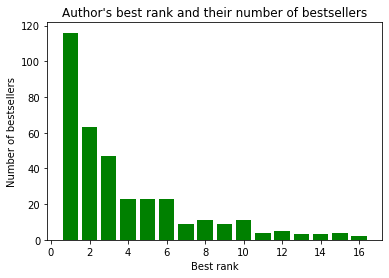

In [222]:
plt.bar(author_best_rank, author_number_of_bestsellers, color='green')
plt.xlabel('Best rank')
plt.ylabel('Number of bestsellers')
plt.title("Author's best rank and their number of bestsellers")

In [191]:
round(np.corrcoef(author_best_rank, author_number_of_bestsellers)[0, 1], 2)

-0.36